# Bikes


This is similar to https://docs.pymc.io/projects/examples/en/latest/BART/BART_introduction.html

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_experimental as pmx

In [2]:
RANDOM_SEED = 8457
rng = np.random.RandomState(RANDOM_SEED)
az.style.use("arviz-darkgrid")

## Biking with BART

In [3]:
bikes = pd.read_csv("bikes.csv")

X = bikes[["hour", "temperature", "humidity", "windspeed"]]
Y = bikes["count"]

In [4]:
with pm.Model(rng_seeder=rng) as model_bikes:
    σ = pm.HalfNormal("σ", Y.std())
    μ = pmx.BART("μ", X, Y, m=50)
    y = pm.Normal("y", μ, σ, observed=Y)
    idata_bikes = pm.sample()

Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 54 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


### Partial dependence plots

/home/pablo/anaconda3/envs/py38_pymc3V4/lib/python3.8/site-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/home/pablo/anaconda3/envs/py38_pymc3V4/lib/python3.8/site-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
/home/pablo/anaconda3/envs/py38_pymc3V4/lib/python3.8/site-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, 

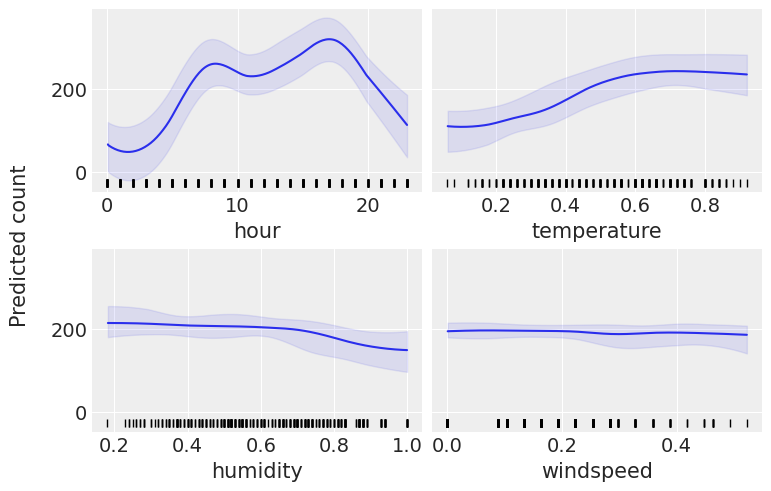

In [5]:
pmx.bart.plot_dependence(idata_bikes, X=X, Y=Y, grid=(2, 2));
# plt.savefig("pdp_discrete.png", bbox_inches='tight')

### Variable importance

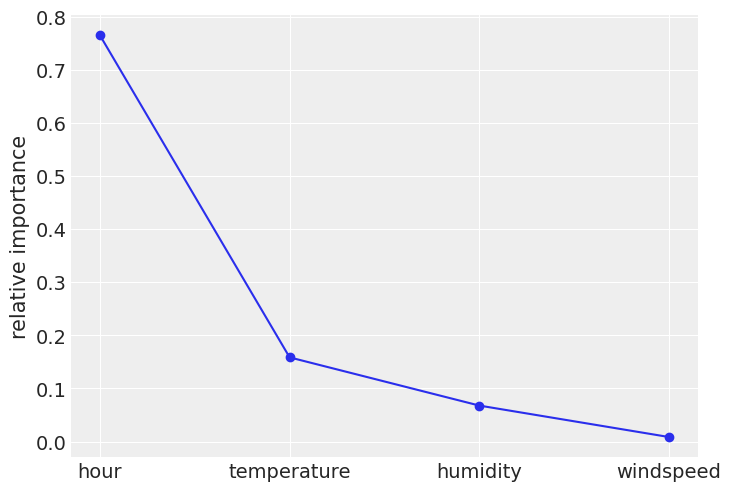

In [6]:
_, ax = plt.subplots(1)
VI = (
    idata_bikes.sample_stats["variable_inclusion"]
    .stack(samples=("chain", "draw"))
    .mean("samples")
    .values
)
ax.plot(VI / VI.sum(), "o-")
ax.set_xticks(range(4))
ax.set_xticklabels(["hour", "temperature", "humidity", "windspeed"])
ax.set_ylabel("relative importance");